# Import Libraries and Exploring The Data

In [76]:
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [77]:
df=pd.read_csv('/content/drive/MyDrive/datasets/alzheimer/alzheimers_disease_data.csv')


In [78]:
df.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [79]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2149 entries, 0 to 2148

Data columns (total 35 columns):

 #   Column                     Non-Null Count  Dtype  

---  ------                     --------------  -----  

 0   PatientID                  2149 non-null   int64  

 1   Age                        2149 non-null   int64  

 2   Gender                     2149 non-null   int64  

 3   Ethnicity                  2149 non-null   int64  

 4   EducationLevel             2149 non-null   int64  

 5   BMI                        2149 non-null   float64

 6   Smoking                    2149 non-null   int64  

 7   AlcoholConsumption         2149 non-null   float64

 8   PhysicalActivity           2149 non-null   float64

 9   DietQuality                2149 non-null   float64

 10  SleepQuality               2149 non-null   float64

 11  FamilyHistoryAlzheimers    2149 non-null   int64  

 12  CardiovascularDisease      2149 non-null   int64  

 13  Diabetes                   214

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [82]:
df=df.drop(['DoctorInCharge','PatientID'], axis=1)

# Correlation

<Axes: >

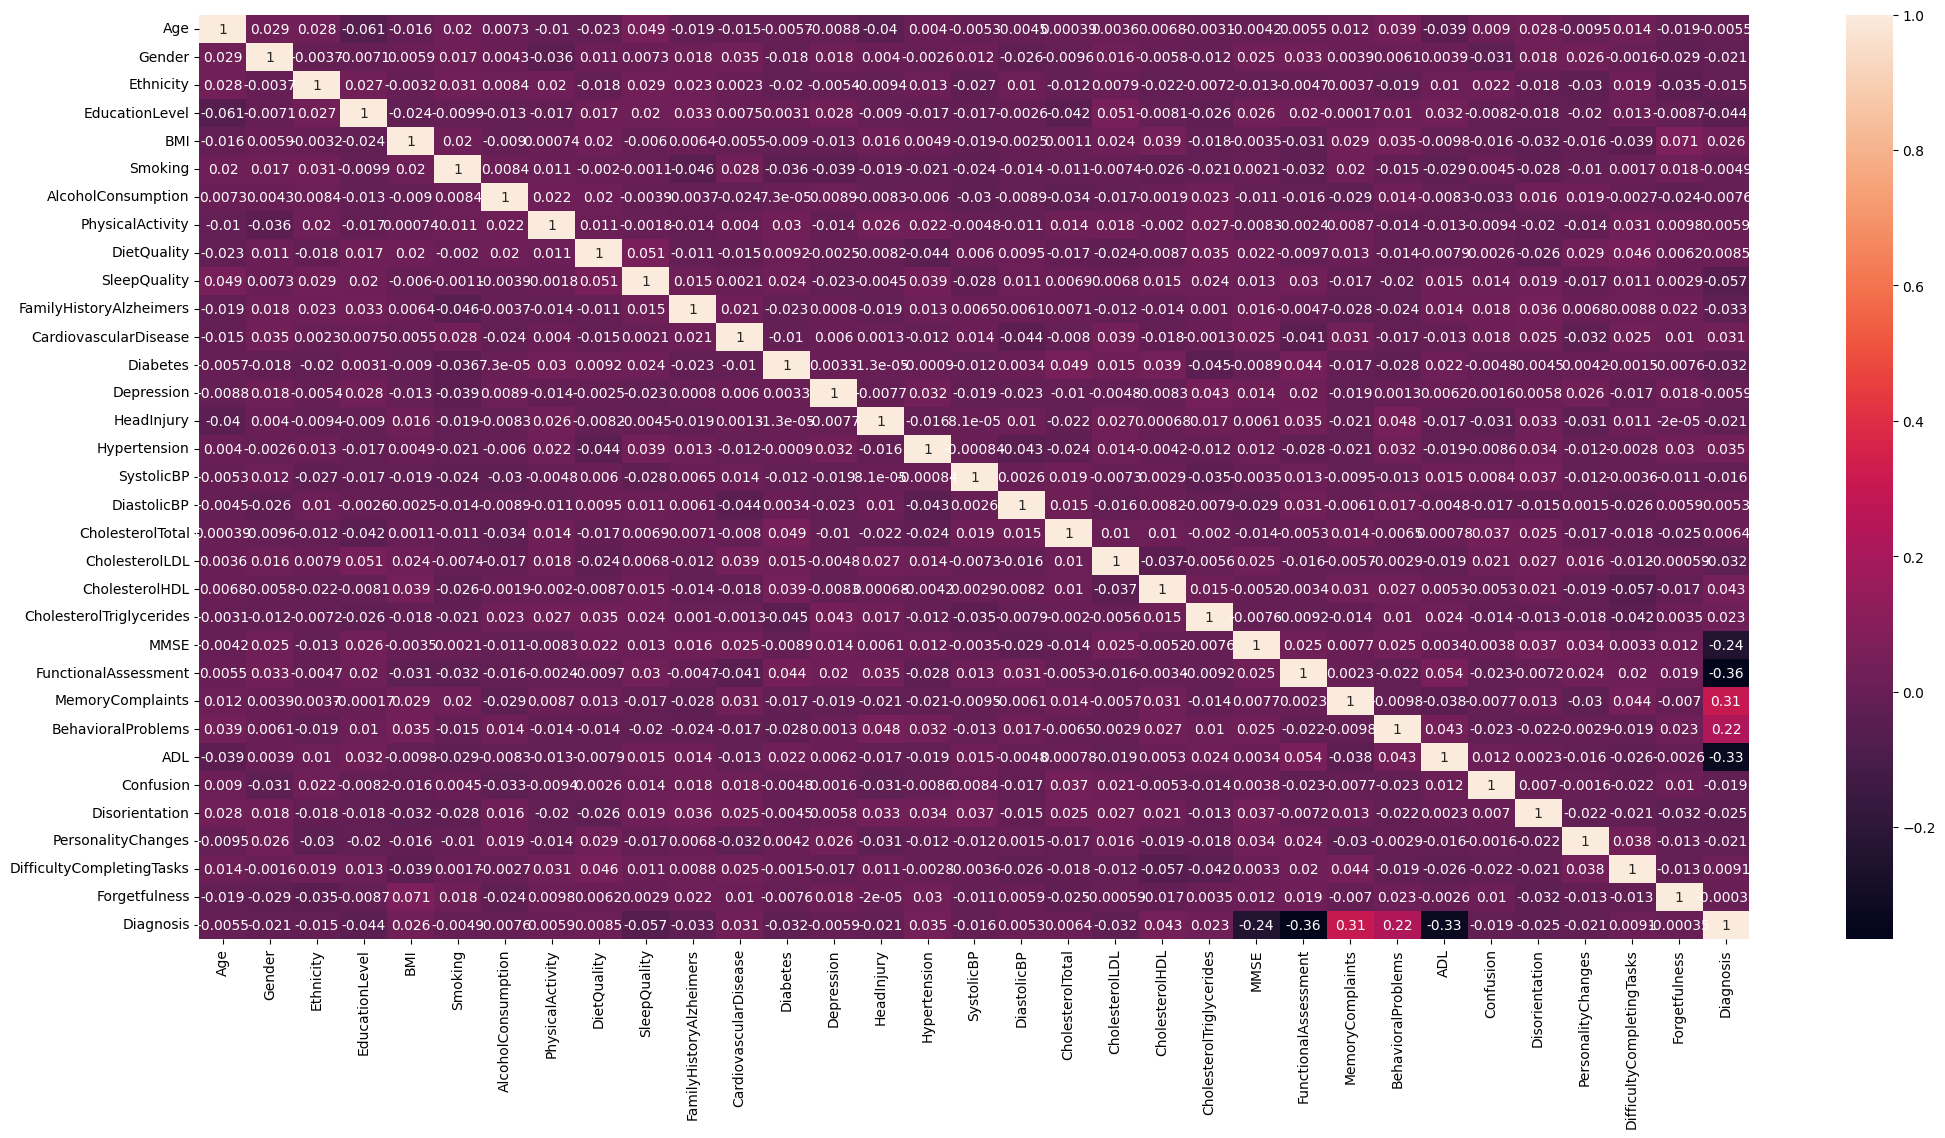

In [83]:
corr=df.corr()
plt.figure(figsize=(25,12))
sns.heatmap(corr,annot=True)

# Exploratory Data Analysis

In [84]:
df['Gender']=df['Gender'].replace({0:'Male',1:'Female'})
df['Ethnicity']=df['Ethnicity'].replace({0:'Caucasian',1:'African American',2:'Asian',3:'Other'})
df['EducationLevel']=df['EducationLevel'].replace({0:'None',1:'High School',2:'Bachelor', 3:'Higher'})
df['Smoking']=df['Smoking'].replace({0:'No',1:'Yes'})
df['Depression']=df['Depression'].replace({0:'No',1:'Yes'})
df['Diabetes']=df['Diabetes'].replace({0:'No',1:'Yes'})
df['Diagnosis']=df['Diagnosis'].replace({0:'No',1:'Yes'})
df['FamilyHistoryAlzheimers']=df['FamilyHistoryAlzheimers'].replace({0:'No',1:'Yes'})
df['MemoryComplaints']=df['MemoryComplaints'].replace({0:'No',1:'Yes'})
df['BehavioralProblems']=df['BehavioralProblems'].replace({0:'No',1:'Yes'})

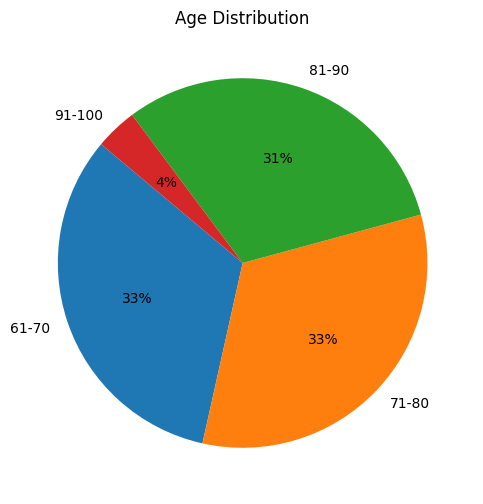

In [85]:
bins = [ 60, 70, 80, 90, 100]
labels = [ '61-70', '71-80', '81-90', '91-100']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_counts = df['Age Group'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%.0f%%', startangle=140)
plt.title('Age Distribution')
plt.show()

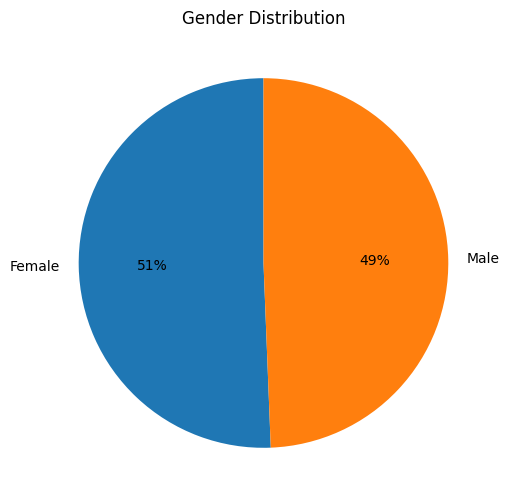

In [86]:
gender=df.Gender.value_counts()
plt.figure(figsize=(12, 6))
plt.pie(gender,labels=gender.index, autopct='%.0f%%',startangle=90)
plt.title('Gender Distribution')
plt.show()

Text(0, 0.5, 'Frequency')

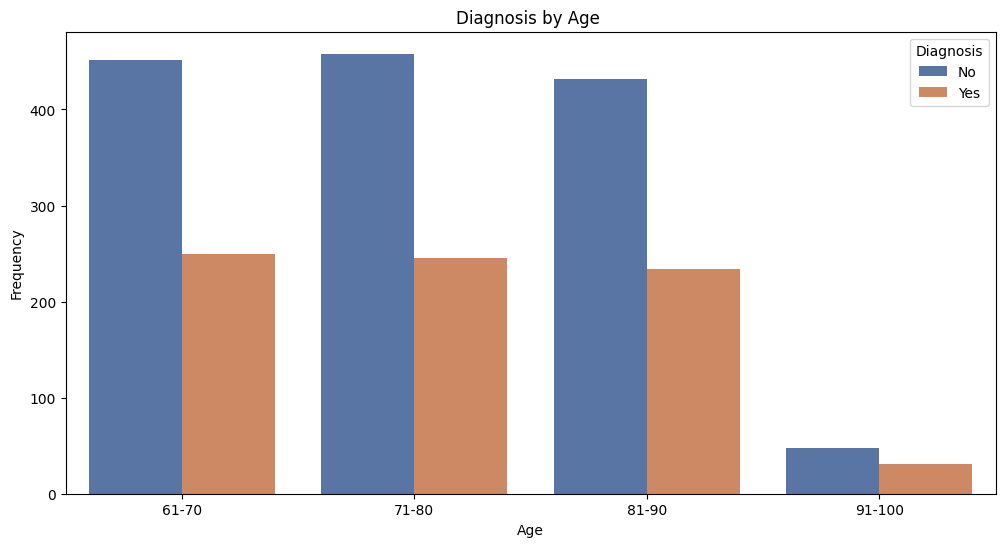

In [87]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age Group', data=df, hue='Diagnosis',palette="deep")
plt.title('Diagnosis by Age ')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

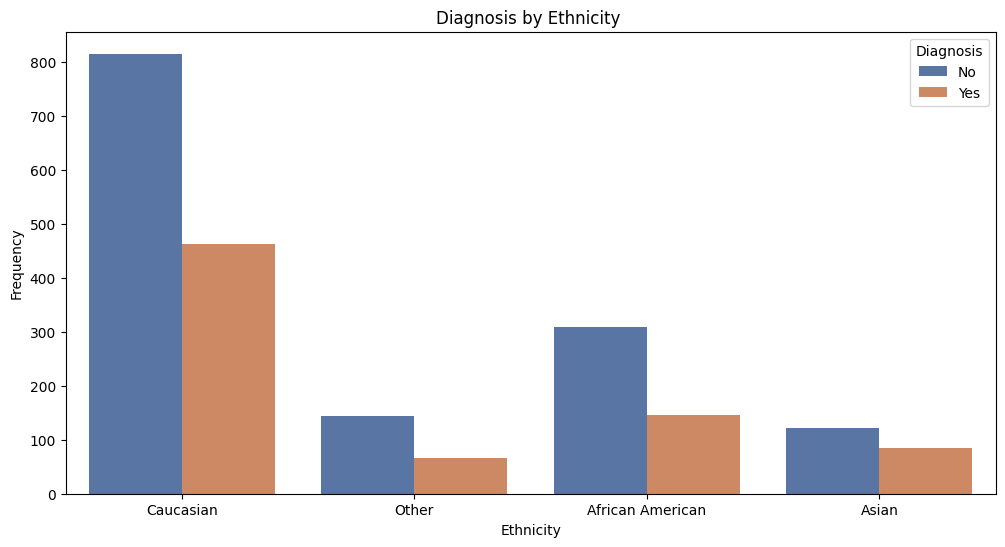

In [88]:
plt.figure(figsize=(12,6))
sns.countplot(x='Ethnicity', data=df, hue='Diagnosis', palette="deep")
plt.title('Diagnosis by Ethnicity ')
plt.xlabel('Ethnicity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

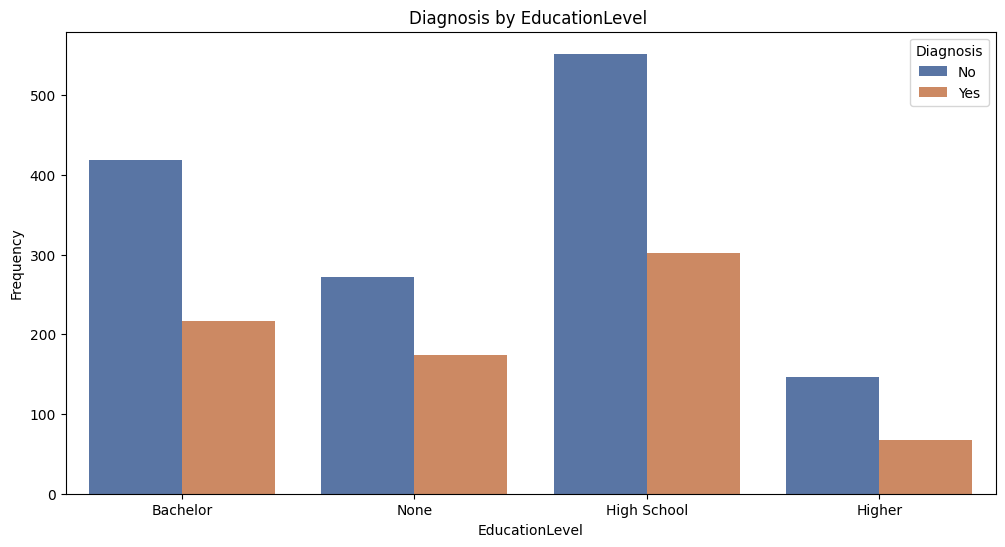

In [89]:
plt.figure(figsize=(12,6))
sns.countplot(x='EducationLevel', data=df, hue='Diagnosis',palette="deep")
plt.title('Diagnosis by EducationLevel ')
plt.xlabel('EducationLevel')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

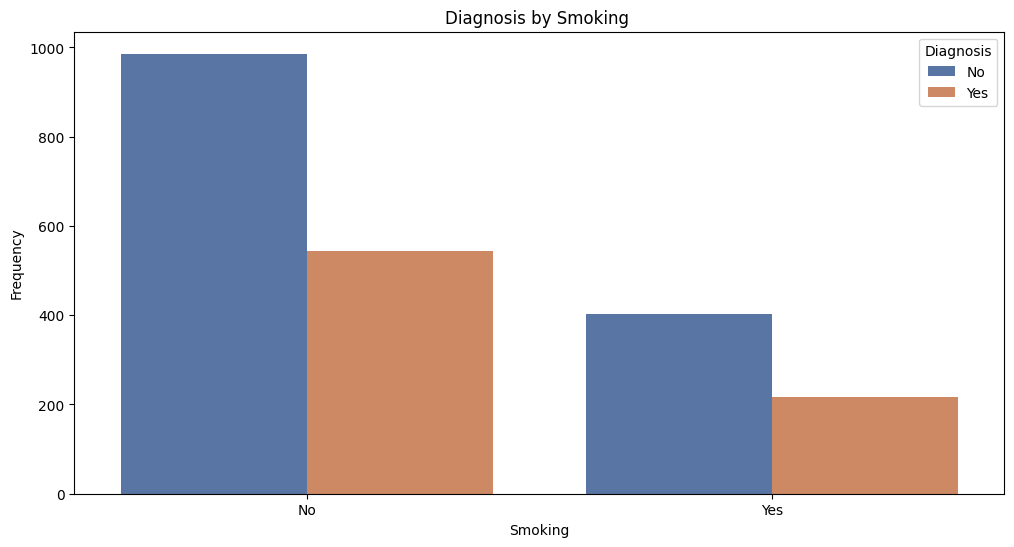

In [90]:
plt.figure(figsize=(12,6))
sns.countplot(x='Smoking', data=df, hue='Diagnosis',palette="deep")
plt.title('Diagnosis by Smoking ')
plt.xlabel('Smoking')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

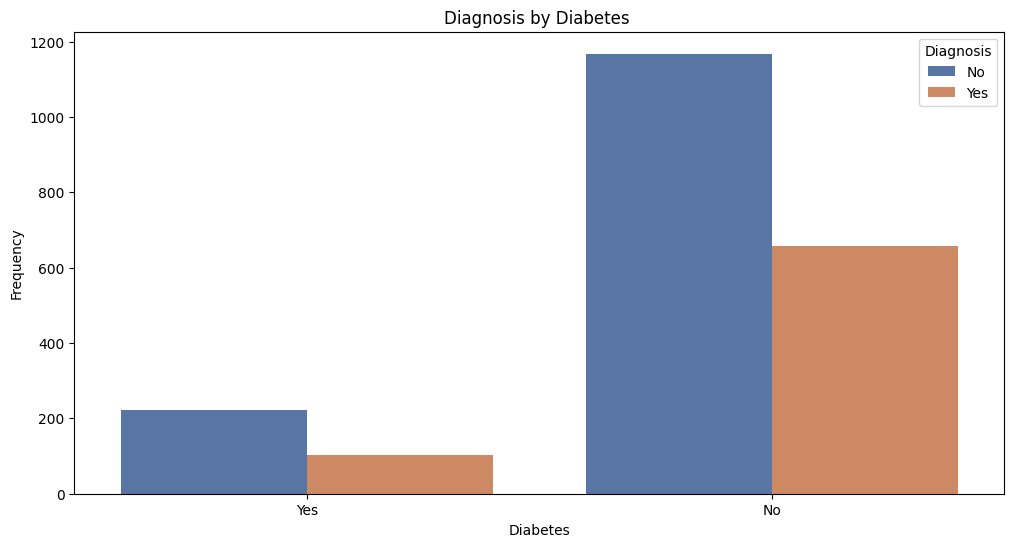

In [91]:
plt.figure(figsize=(12,6))
sns.countplot(x='Diabetes', data=df, hue='Diagnosis',palette="deep")
plt.title('Diagnosis by Diabetes ')
plt.xlabel('Diabetes')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

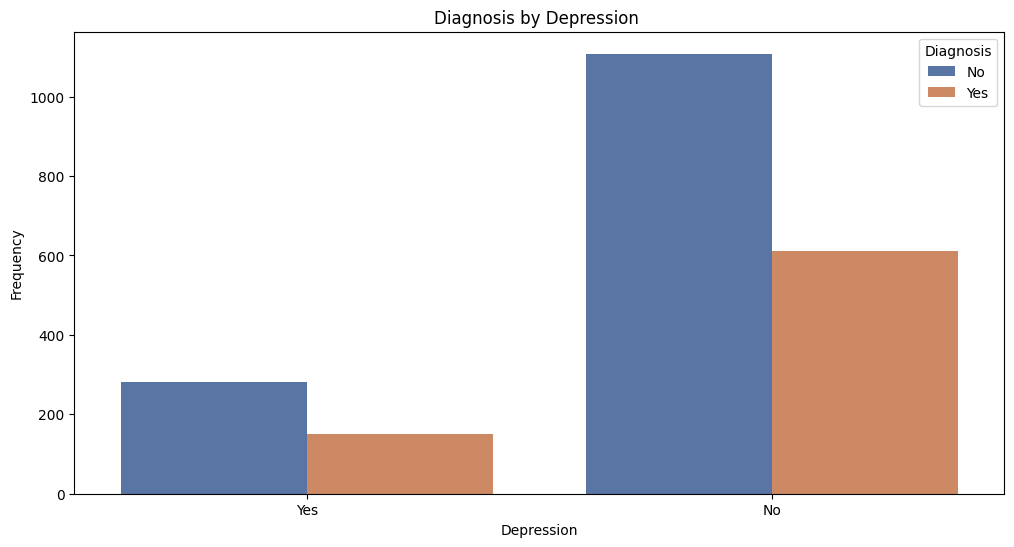

In [92]:
plt.figure(figsize=(12,6))
sns.countplot(x='Depression', data=df, hue='Diagnosis',palette="deep")
plt.title('Diagnosis by Depression ')
plt.xlabel('Depression')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

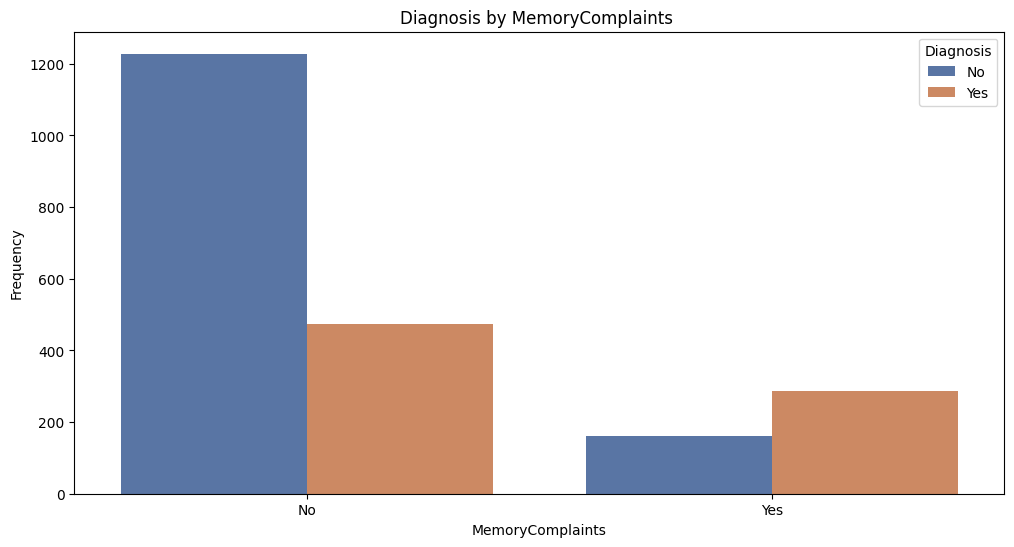

In [93]:
plt.figure(figsize=(12,6))
sns.countplot(x='MemoryComplaints', data=df, hue='Diagnosis',palette="deep")
plt.title('Diagnosis by MemoryComplaints ')
plt.xlabel('MemoryComplaints')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

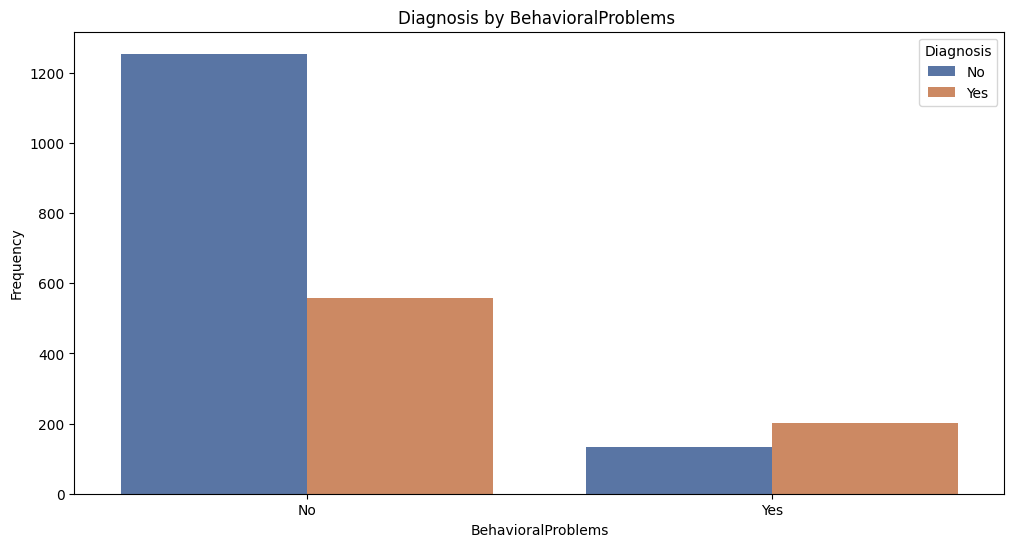

In [94]:
plt.figure(figsize=(12,6))
sns.countplot(x='BehavioralProblems', data=df, hue='Diagnosis',palette="deep")
plt.title('Diagnosis by BehavioralProblems ')
plt.xlabel('BehavioralProblems')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

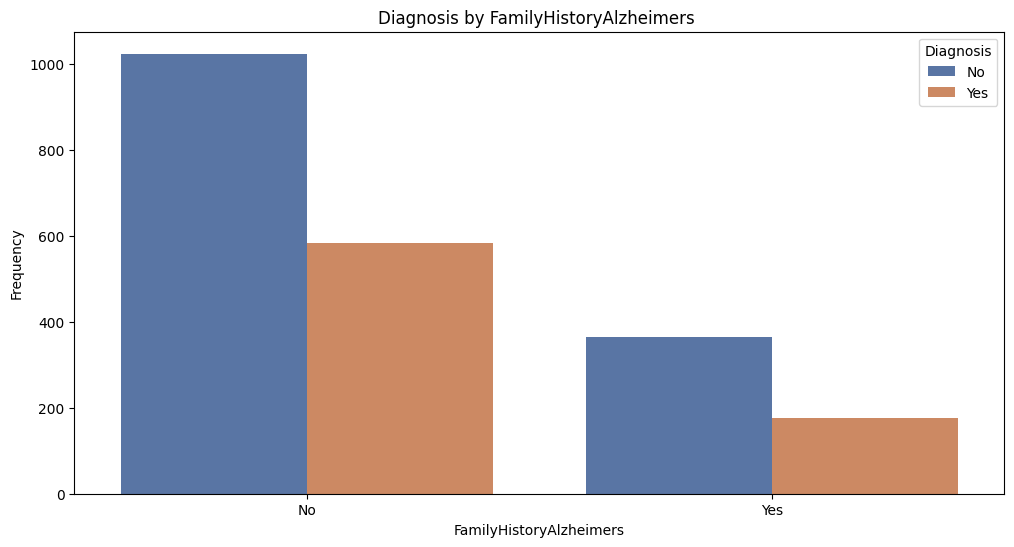

In [95]:
plt.figure(figsize=(12,6))
sns.countplot(x='FamilyHistoryAlzheimers', data=df, hue='Diagnosis',palette="deep")
plt.title('Diagnosis by FamilyHistoryAlzheimers ')
plt.xlabel('FamilyHistoryAlzheimers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

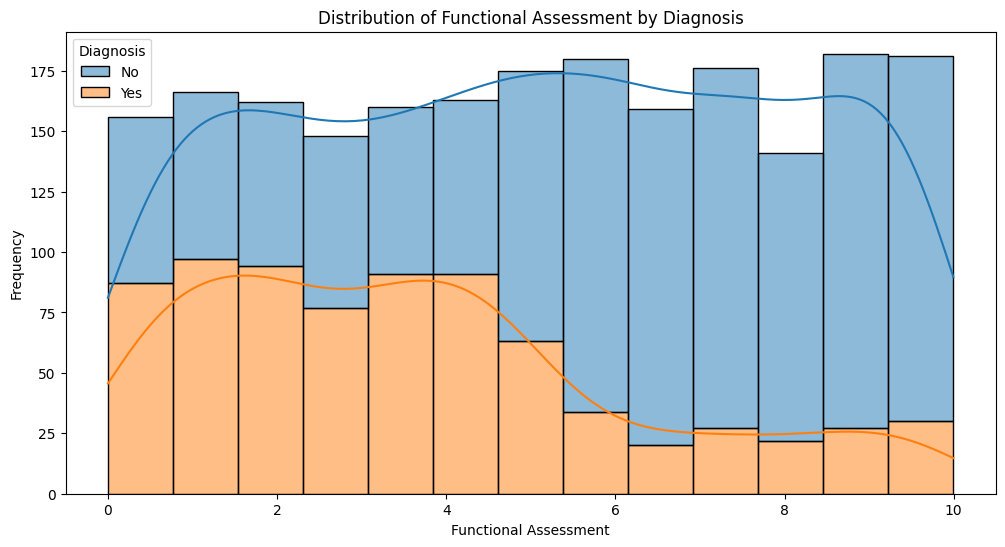

In [97]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='FunctionalAssessment', hue='Diagnosis', kde=True, multiple='stack')
plt.title('Distribution of Functional Assessment by Diagnosis')
plt.xlabel('Functional Assessment')
plt.ylabel('Frequency')

# Label Encoding

In [99]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [100]:
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Ethnicity']=label_encoder.fit_transform(df['Ethnicity'])
df['EducationLevel']=label_encoder.fit_transform(df['EducationLevel'])
df['Smoking']=label_encoder.fit_transform(df['Smoking'])
df['Depression']=label_encoder.fit_transform(df['Depression'])
df['Diabetes']=label_encoder.fit_transform(df['Diabetes'])
df['Diagnosis']=label_encoder.fit_transform(df['Diagnosis'])
df['FamilyHistoryAlzheimers']=label_encoder.fit_transform(df['FamilyHistoryAlzheimers'])
df['MemoryComplaints']=label_encoder.fit_transform(df['MemoryComplaints'])
df['BehavioralProblems']=label_encoder.fit_transform(df['BehavioralProblems'])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2149 entries, 0 to 2148

Data columns (total 34 columns):

 #   Column                     Non-Null Count  Dtype   

---  ------                     --------------  -----   

 0   Age                        2149 non-null   int64   

 1   Gender                     2149 non-null   int64   

 2   Ethnicity                  2149 non-null   int64   

 3   EducationLevel             2149 non-null   int64   

 4   BMI                        2149 non-null   float64 

 5   Smoking                    2149 non-null   int64   

 6   AlcoholConsumption         2149 non-null   float64 

 7   PhysicalActivity           2149 non-null   float64 

 8   DietQuality                2149 non-null   float64 

 9   SleepQuality               2149 non-null   float64 

 10  FamilyHistoryAlzheimers    2149 non-null   int64   

 11  CardiovascularDisease      2149 non-null   int64   

 12  Diabetes                   2149 non-null   int64   

 13  Depression     

# Building The Mode

In [102]:
x=df.drop(['Diagnosis','Age Group'],axis=1)
y=df.Diagnosis

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [104]:
RN=RandomForestClassifier()
RN.fit(x_train,y_train)

RandomForestClassifier()

In [105]:
RNpred=RN.predict(x_test)

In [106]:
accuracy_score(RNpred,y_test)

0.9279069767441861

In [107]:
confusion_matrix(RNpred,y_test)

array([[272,  26],
       [  5, 127]])

<Axes: >

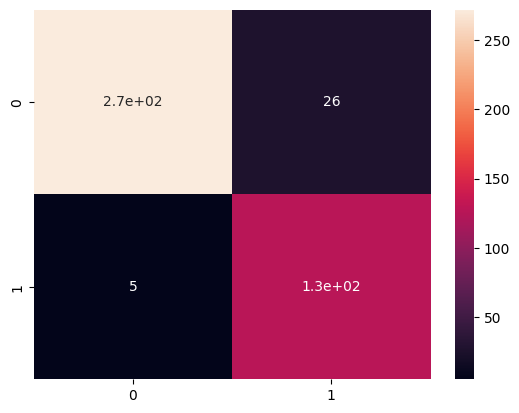

In [108]:
cm=confusion_matrix(RNpred,y_test)
sns.heatmap(cm ,annot=True)

In [109]:
CR=classification_report(y_test, RNpred)
print(CR)

              precision    recall  f1-score   support



           0       0.91      0.98      0.95       277

           1       0.96      0.83      0.89       153



    accuracy                           0.93       430

   macro avg       0.94      0.91      0.92       430

weighted avg       0.93      0.93      0.93       430


